In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from AnalyseDefectsMinimal import AnalyseDefectsMinimal

In [2]:
def gen_analysis_dict(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd', \
              suffix = "short", priority = -1, LX = LL, Nframes = 200, Ninfo = 2000)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_l', \
                suffix = "l", priority = 0, LX = LL, Nframes = 200, Ninfo = 5000)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_vl',\
                    suffix = "vl", priority = 3, LX = LL, Nframes = 500, Ninfo = 10000)

    defect_list = [dshort, dlong, dvery_long,] if mode == 'all' else [dshort]
    return defect_list

In [3]:
## lav en p(n_inter, std_max)
## fyr op og lav plot

In [4]:
LL = 512
output_path = f'data\\na512sd'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)
 
ad = AnalyseDefectsMinimal(defect_list, output_path=output_path)

extract = False
analyze = False

In [5]:
if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()

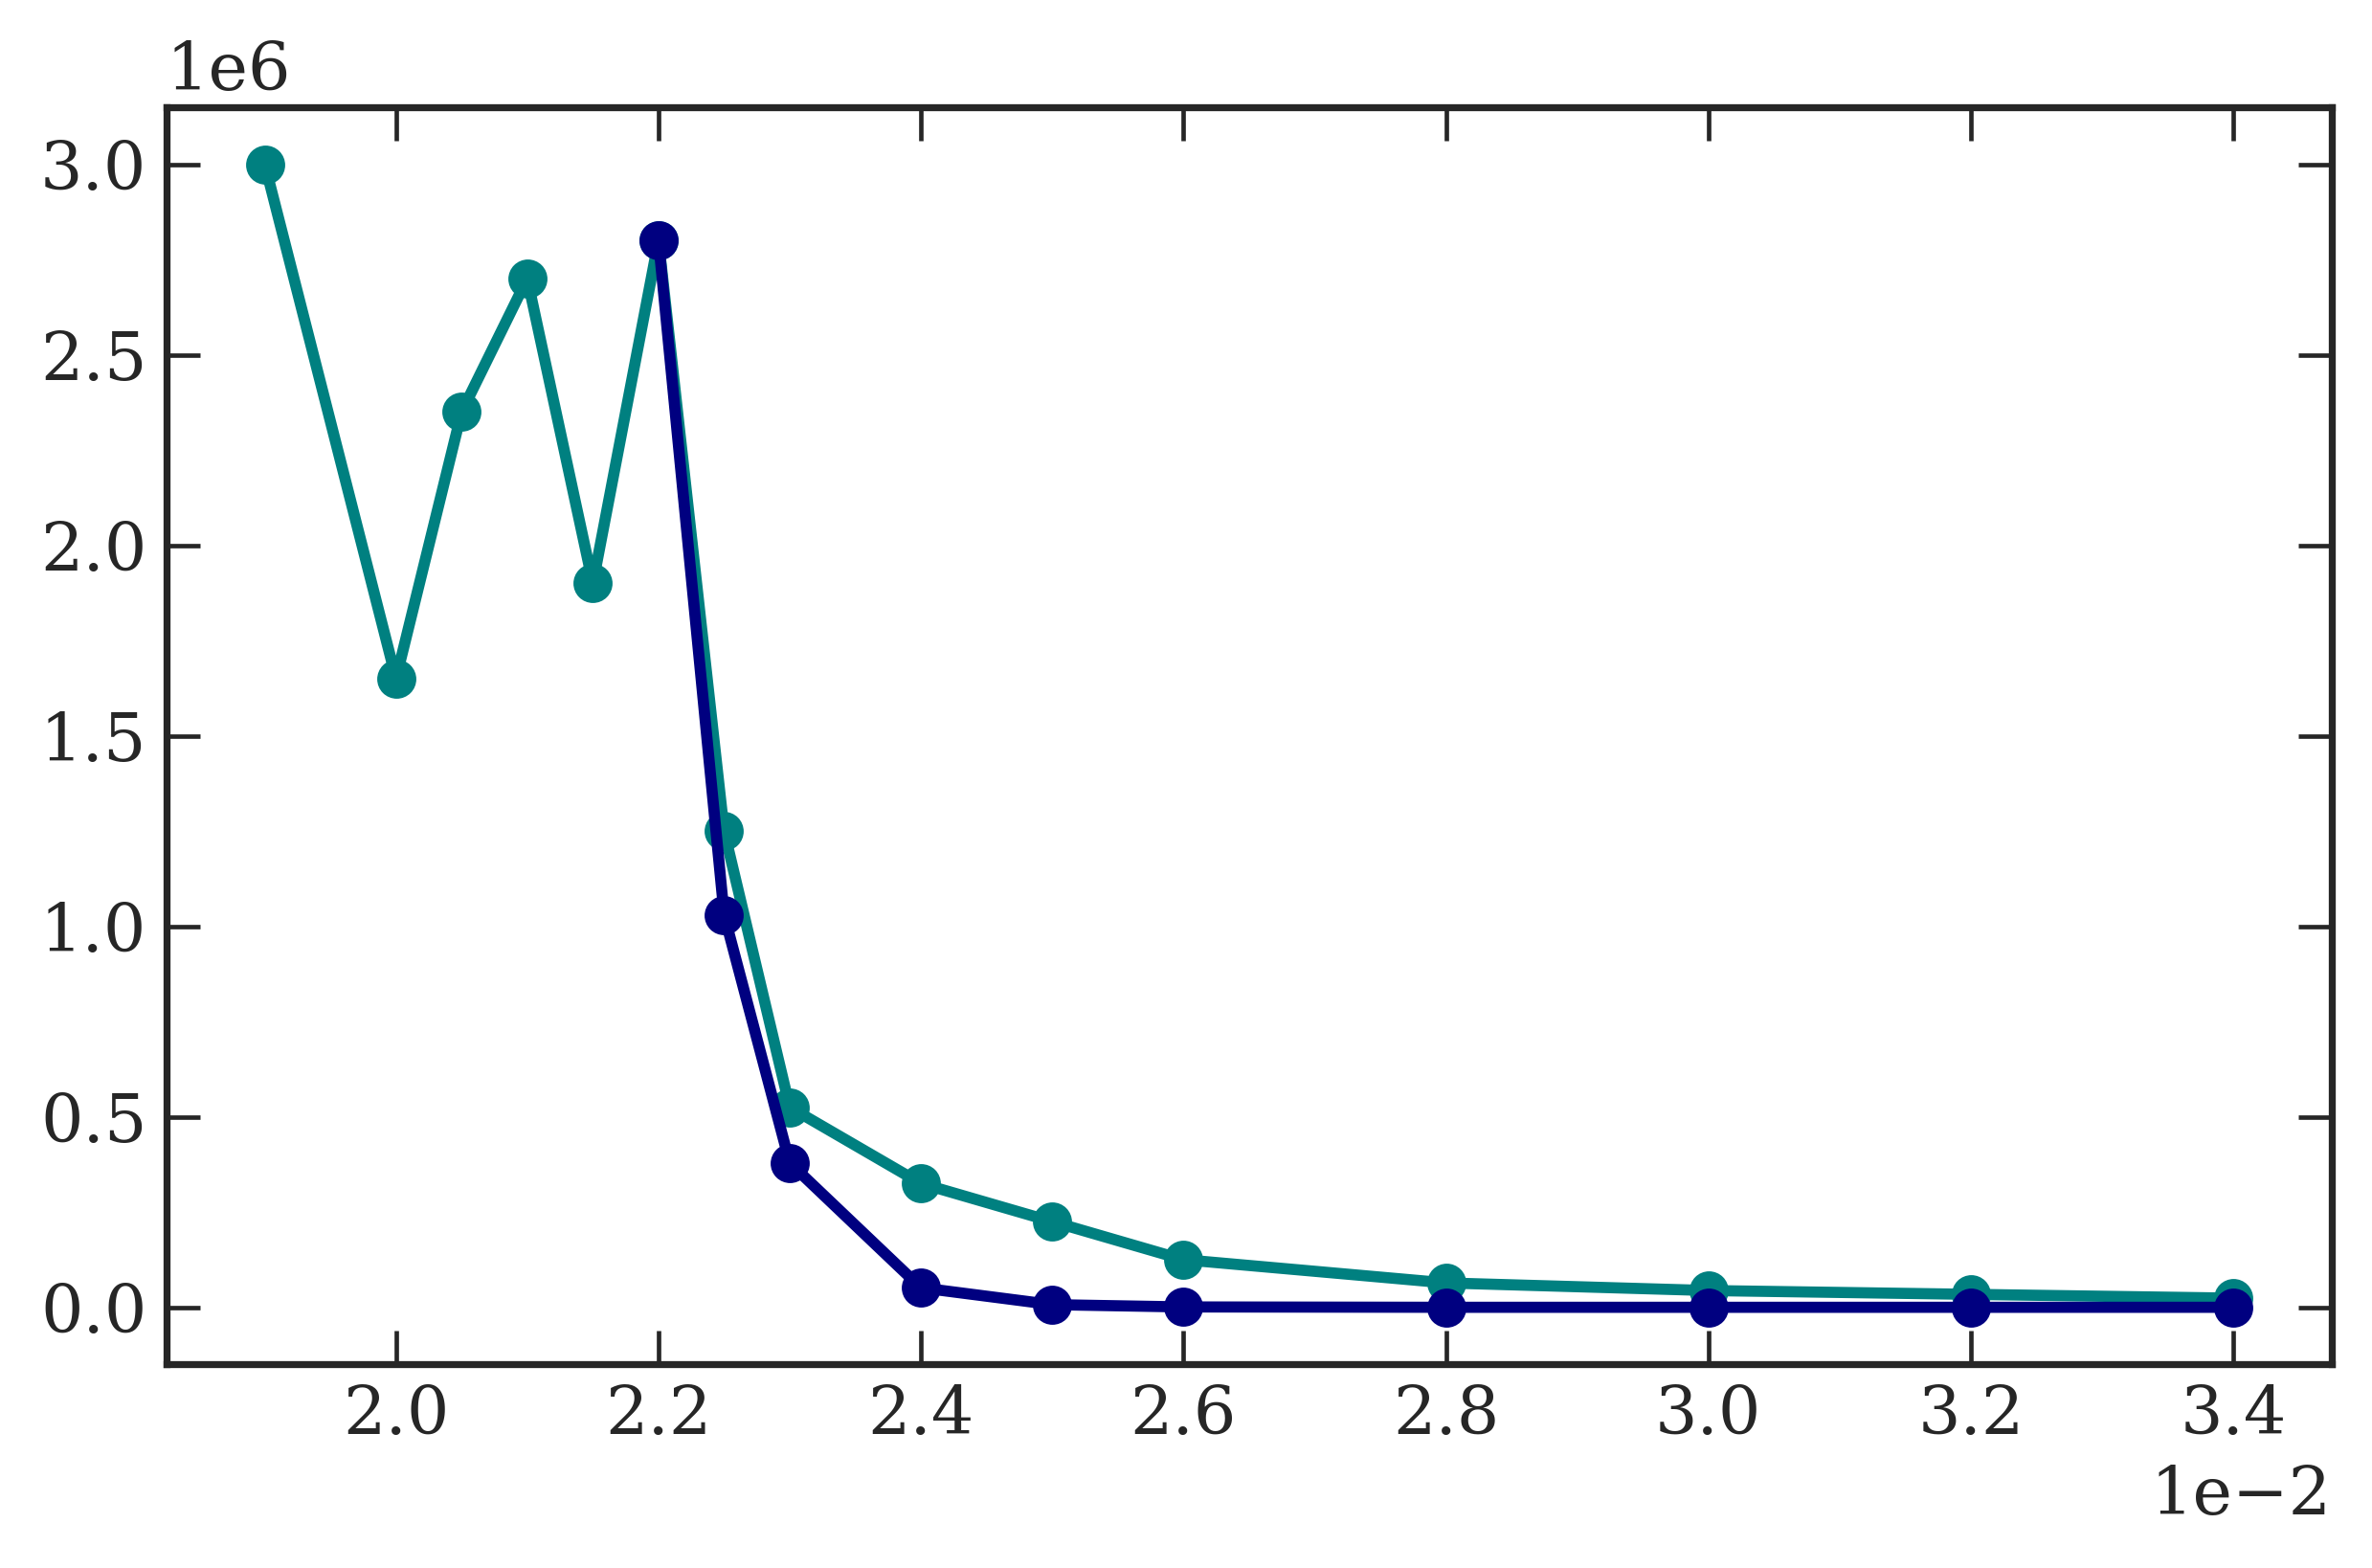

In [6]:
act_list_full = []
for act_list in ad.act_list:
    act_list_full.extend(act_list)
act_list_full.sort()
conv_list0 = [64000, 44000, 34000, 24000]
conv_list1 = [525000, 325000, 225000, 125000]
conv_list2 = [4000000, 3000000, 1650000, 2350000, 2700000, 1900000, 2800000, 1250000]
conv_list = conv_list2 + conv_list1 + conv_list0


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(act_list_full[1:], conv_list[1:], 'o-', label='short')

act_crit_idx = act_list_full.index(0.022)
scaling = 0.0005
Y = conv_list[act_crit_idx] * np.exp(- (act_list_full[act_crit_idx:] - act_list_full[act_crit_idx]) / scaling)
ax.plot(act_list_full[act_crit_idx:], Y, 'o-', label='long')

In [7]:
conv_list

[4000000,
 3000000,
 1650000,
 2350000,
 2700000,
 1900000,
 2800000,
 1250000,
 525000,
 325000,
 225000,
 125000,
 64000,
 44000,
 34000,
 24000]

64000
44000
34000
24000


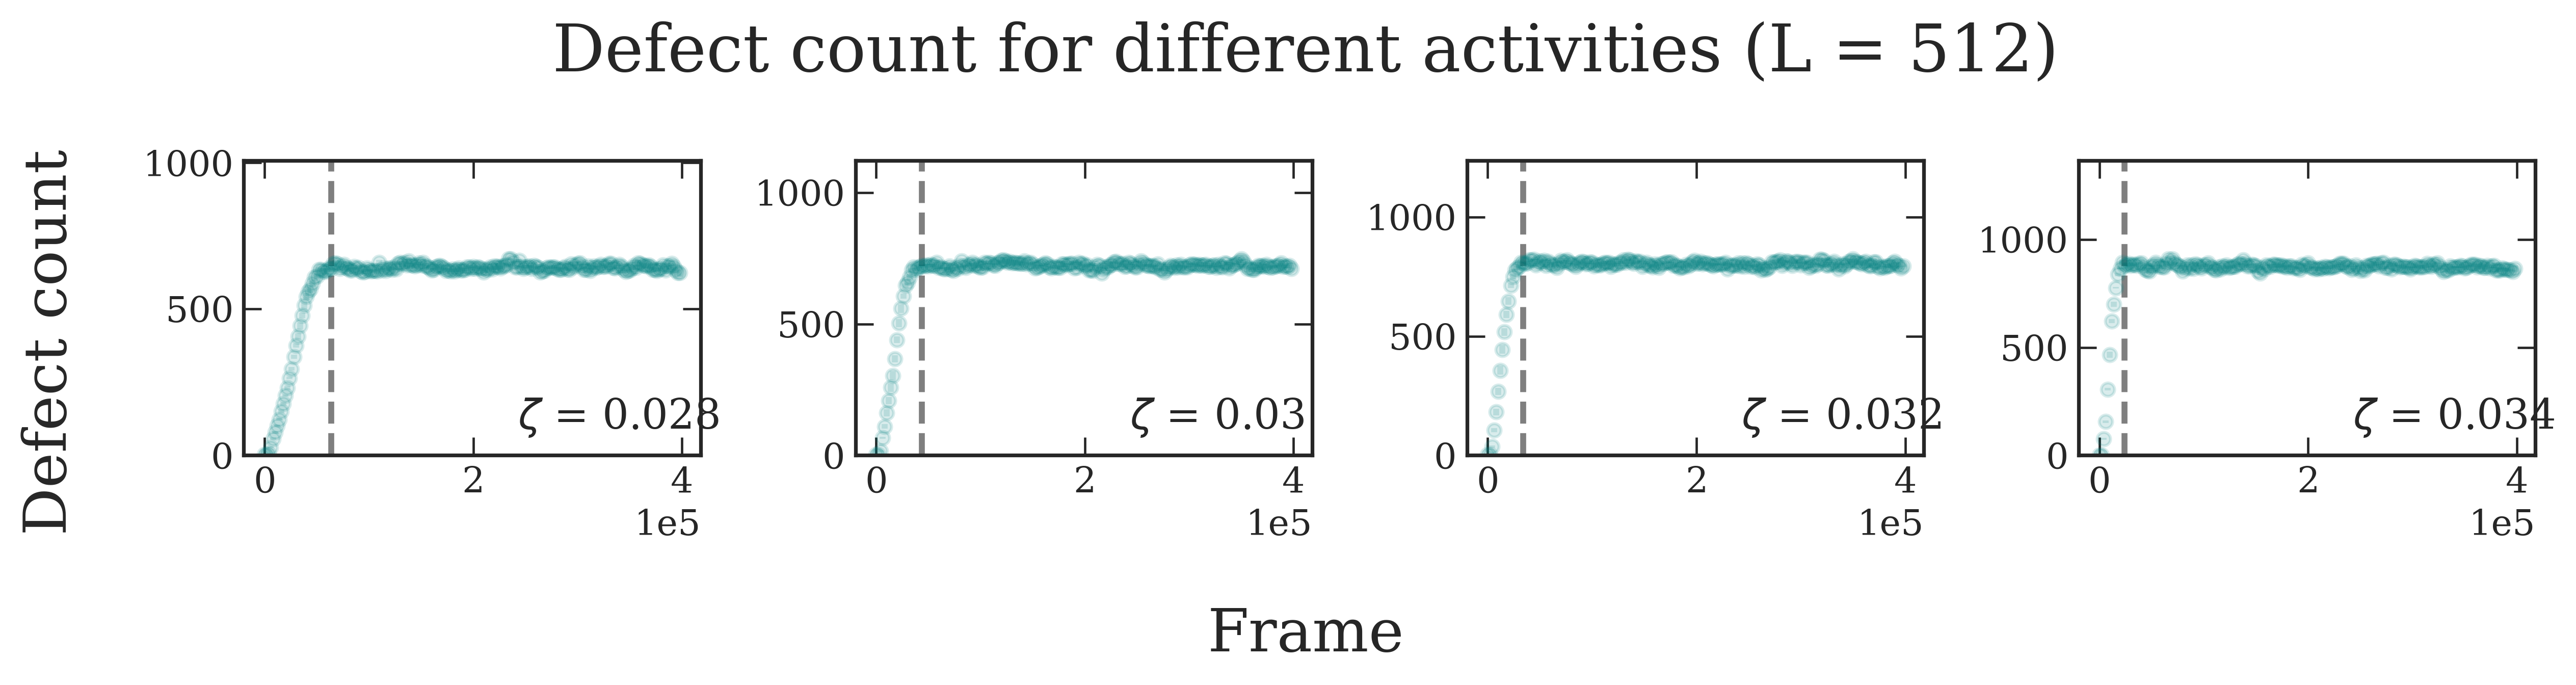

(<Figure size 5040x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [8]:
block_len = 5
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 125, max_sigma_dist = 1)
ad.plot_defects_per_activity(Ndataset=0, estimate_stationarity=True, stationarity_dict=stationarity_dict)

525000
325000
225000
125000


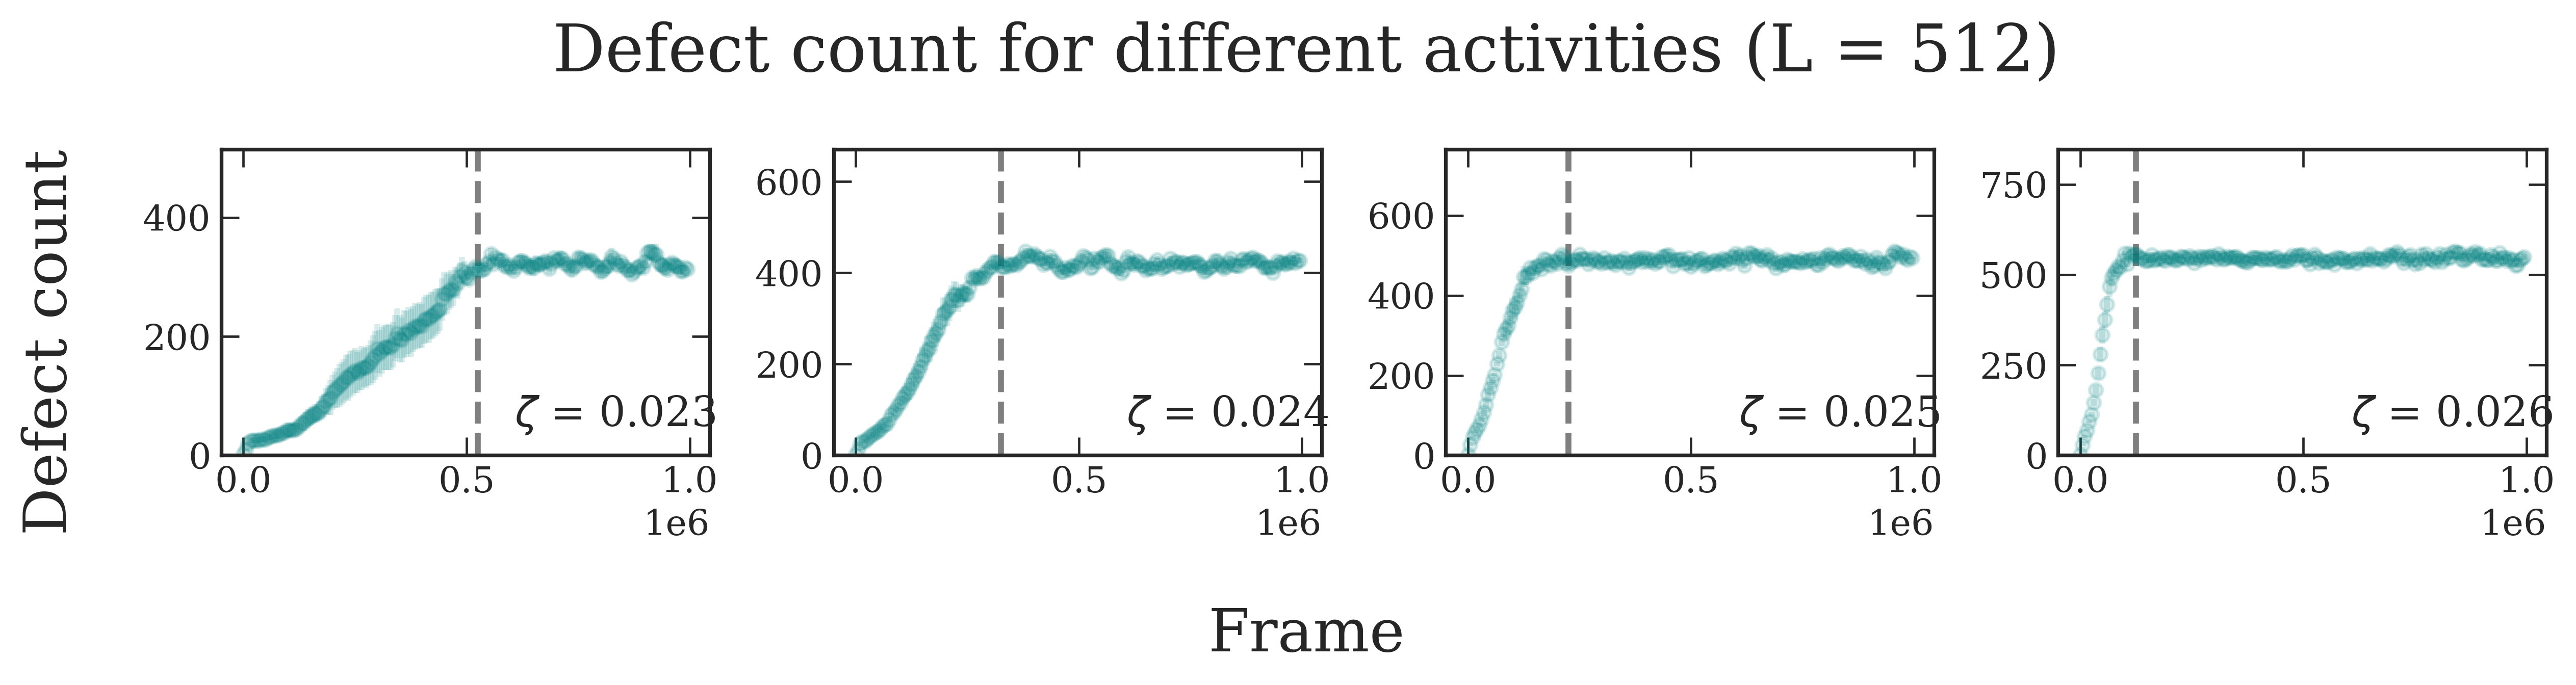

(<Figure size 5040x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [9]:
block_len = 10
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 80, max_sigma_dist = .5)
ad.plot_defects_per_activity(Ndataset=1, estimate_stationarity=True, stationarity_dict=stationarity_dict)

2650000
2450000
1650000
2350000
2450000
1450000
2250000
1250000


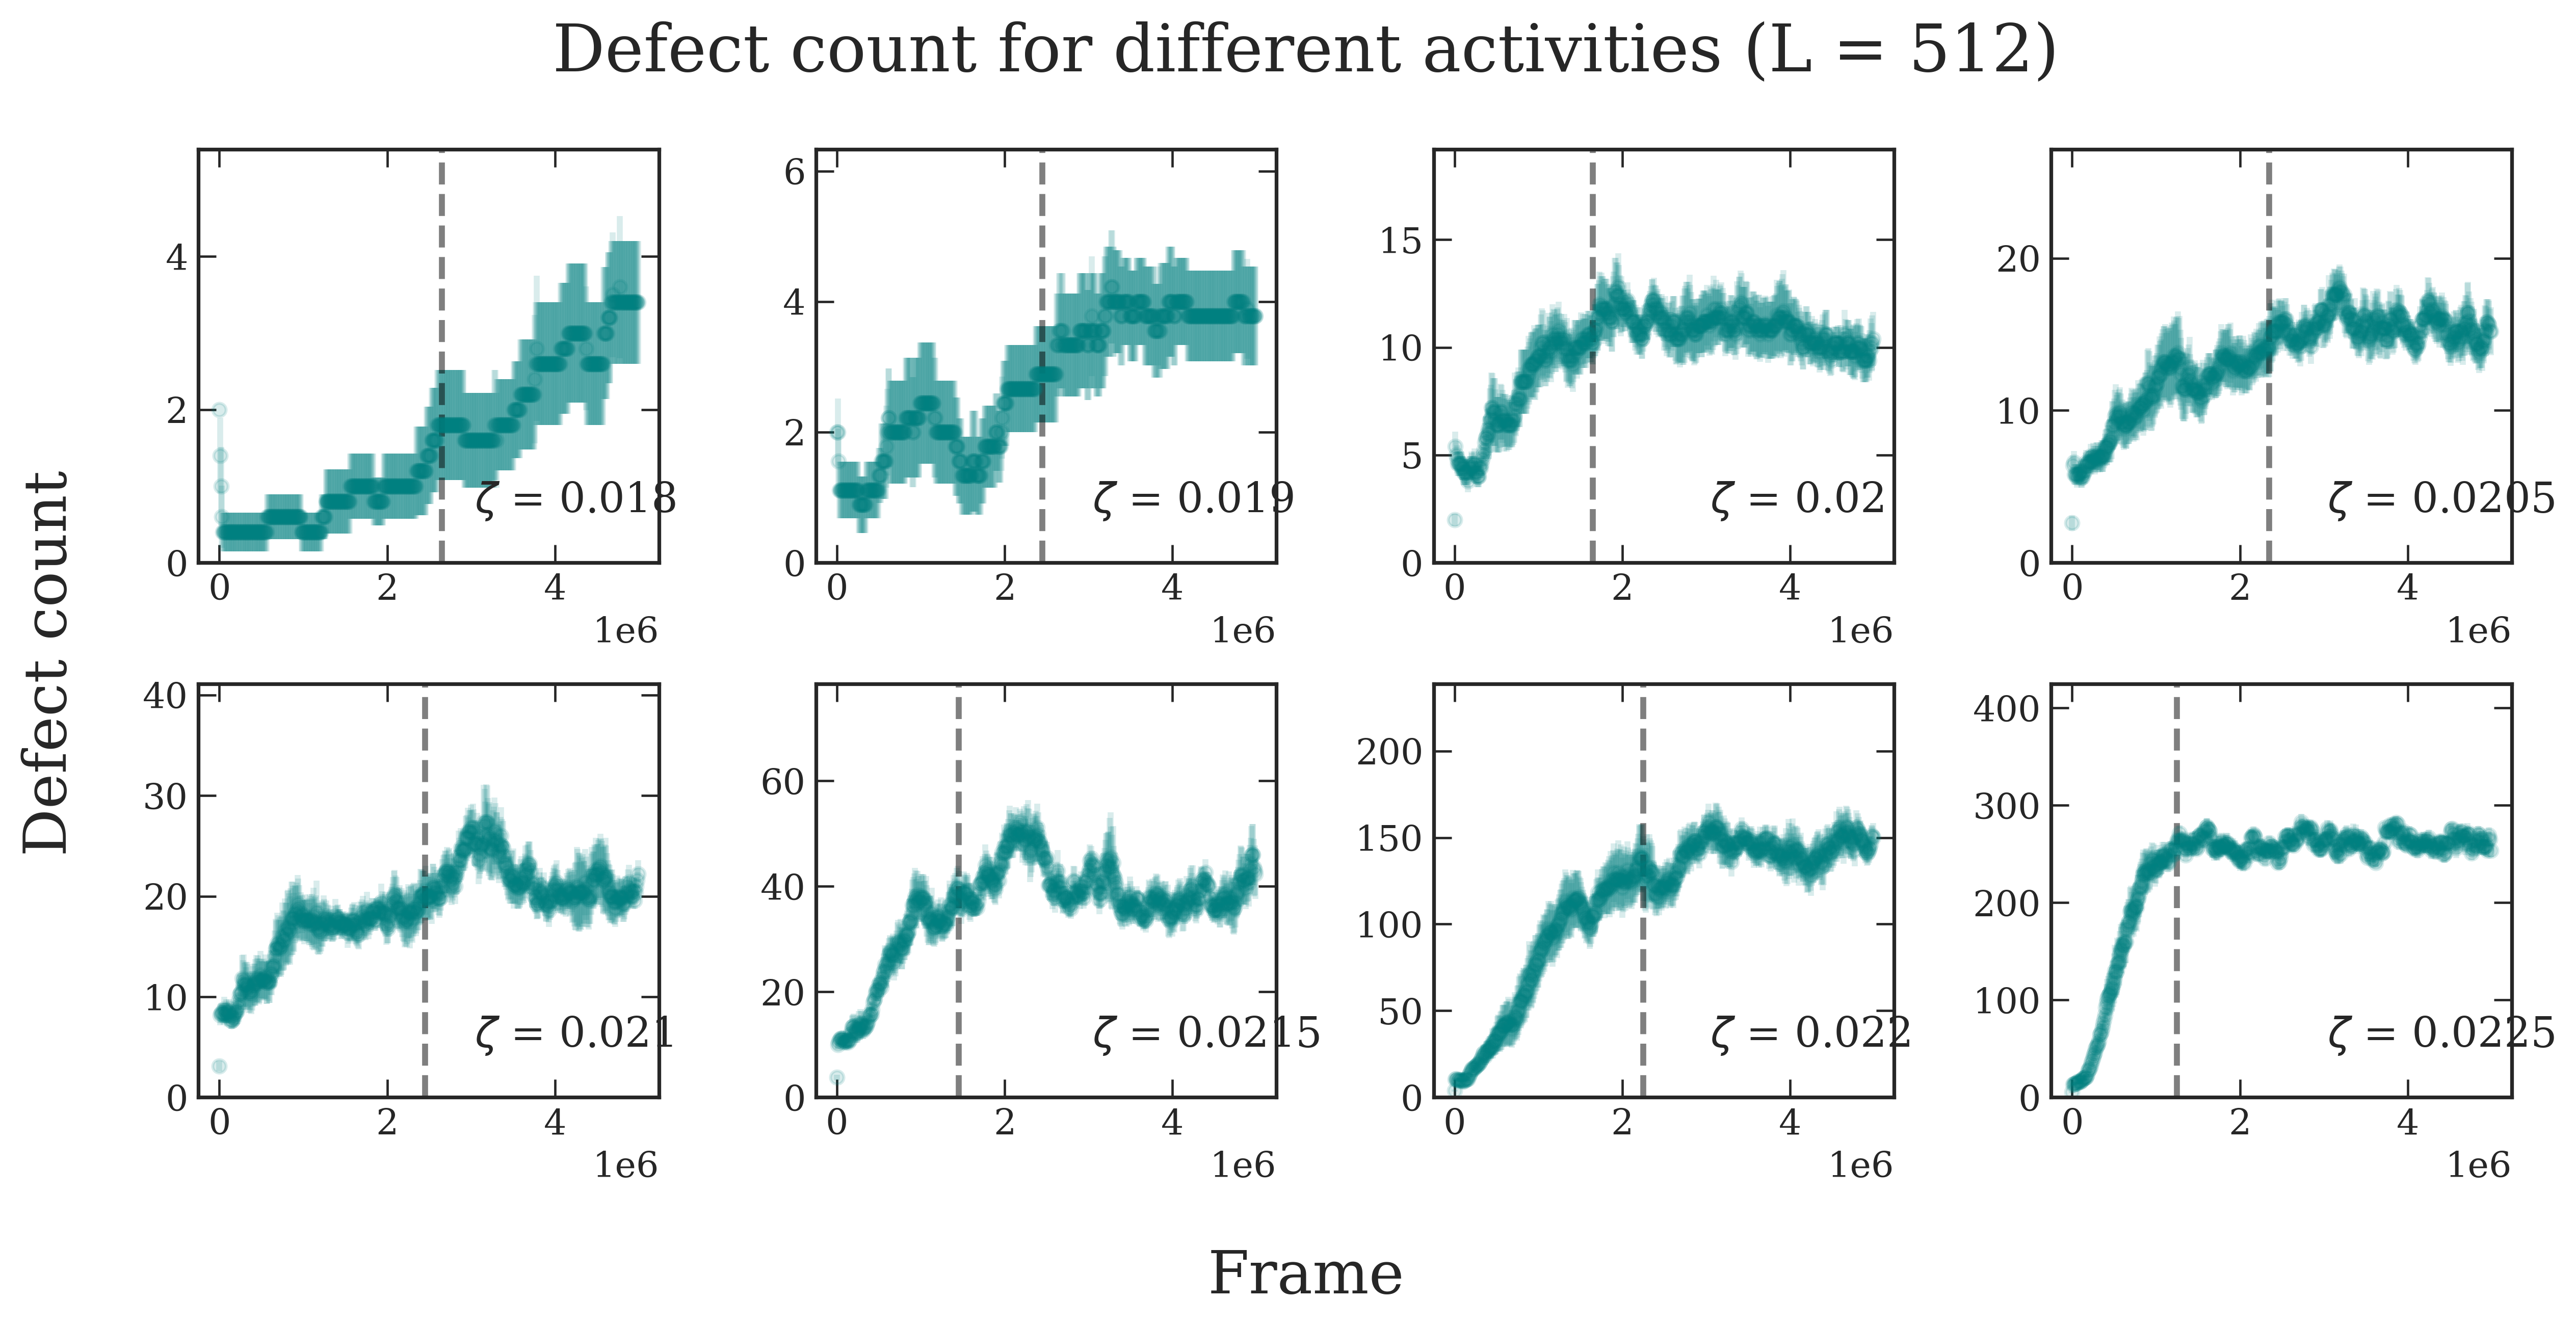

(<Figure size 5040x2520 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

In [10]:
block_len = 10
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 150, max_sigma_dist = .5)
ad.plot_defects_per_activity(Ndataset=2, estimate_stationarity=True, stationarity_dict=stationarity_dict)

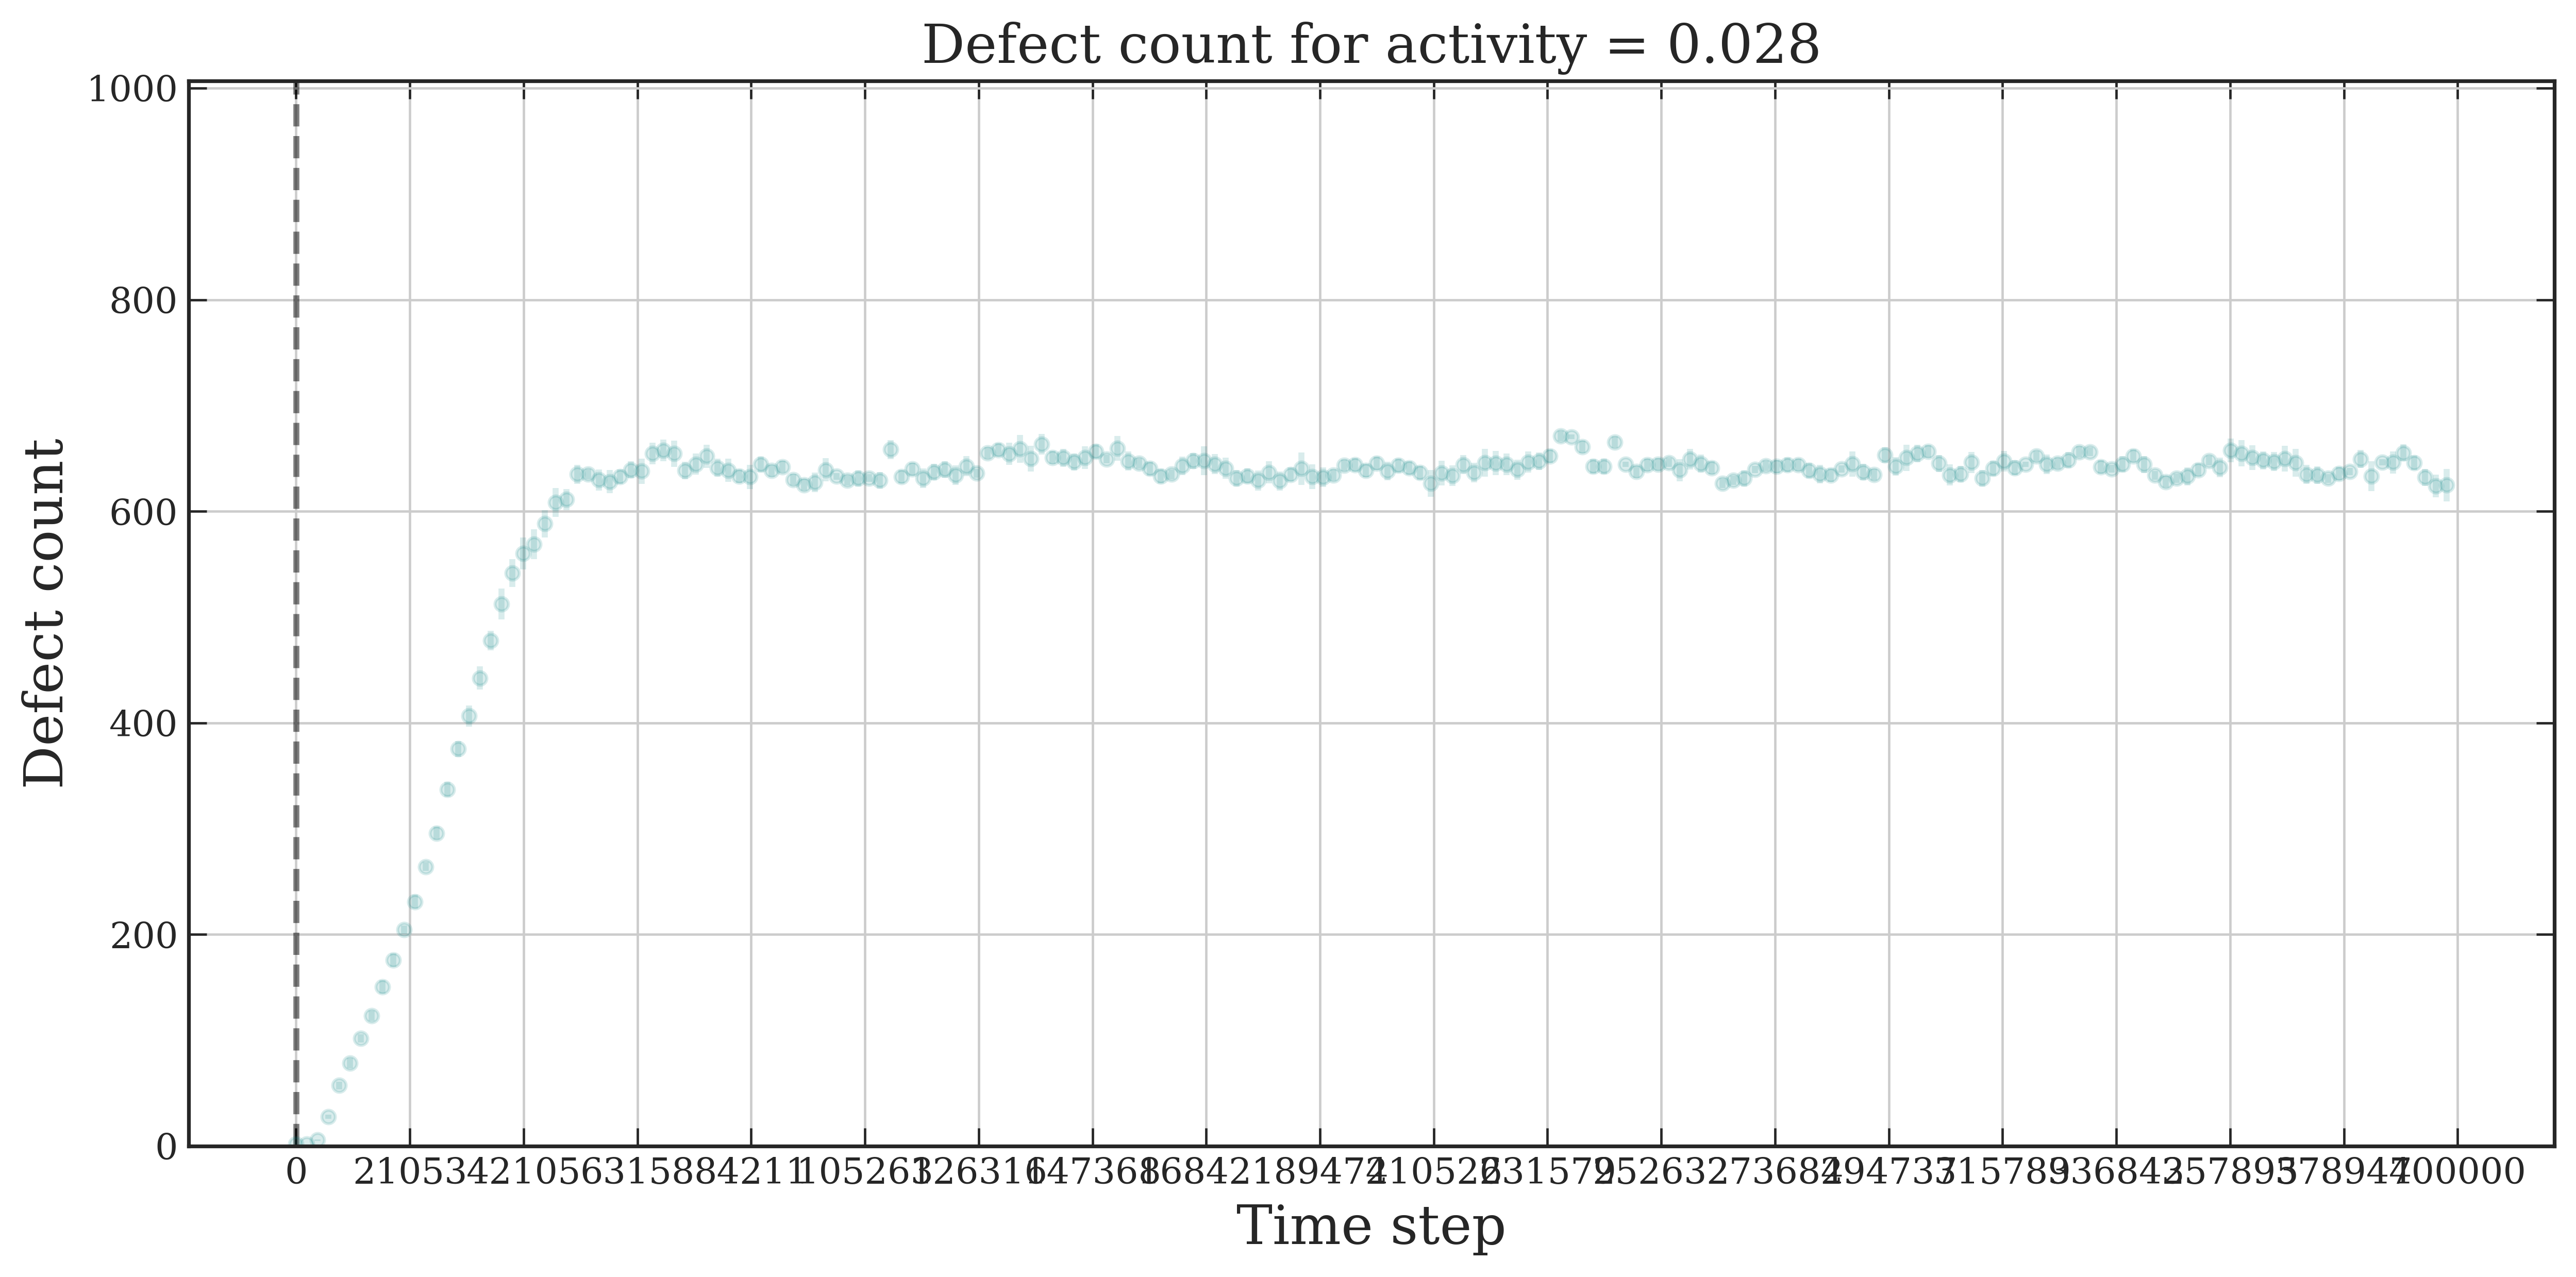

ValueError: invalid literal for int() with base 10: ''

In [11]:
block_len = 10
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 125, max_sigma_dist = 1)
ad.update_conv_list(Ndataset_list=[0], estimate_stationarity=True, stationarity_dict=stationarity_dict)